100%|██████████| 14093/14093 [01:03<00:00, 222.76it/s] 


✅ Loaded: (15579, 16384) (14093, 16384)


C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



✅ Final Test Accuracy: 0.3653
              precision    recall  f1-score   support

       anger       0.32      0.27      0.30      1815
    contempt       0.24      0.24      0.24      1511
     disgust       0.31      0.25      0.28      1778
        fear       0.34      0.27      0.30      1552
       happy       0.65      0.58      0.61      2281
     neutral       0.26      0.31      0.28      1378
         sad       0.39      0.68      0.50      1500
    surprise       0.32      0.28      0.30      2278

    accuracy                           0.37     14093
   macro avg       0.35      0.36      0.35     14093
weighted avg       0.37      0.37      0.36     14093



C:\Users\fatom\AppData\Local\Temp\ipykernel_7060\334108571.py:81: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


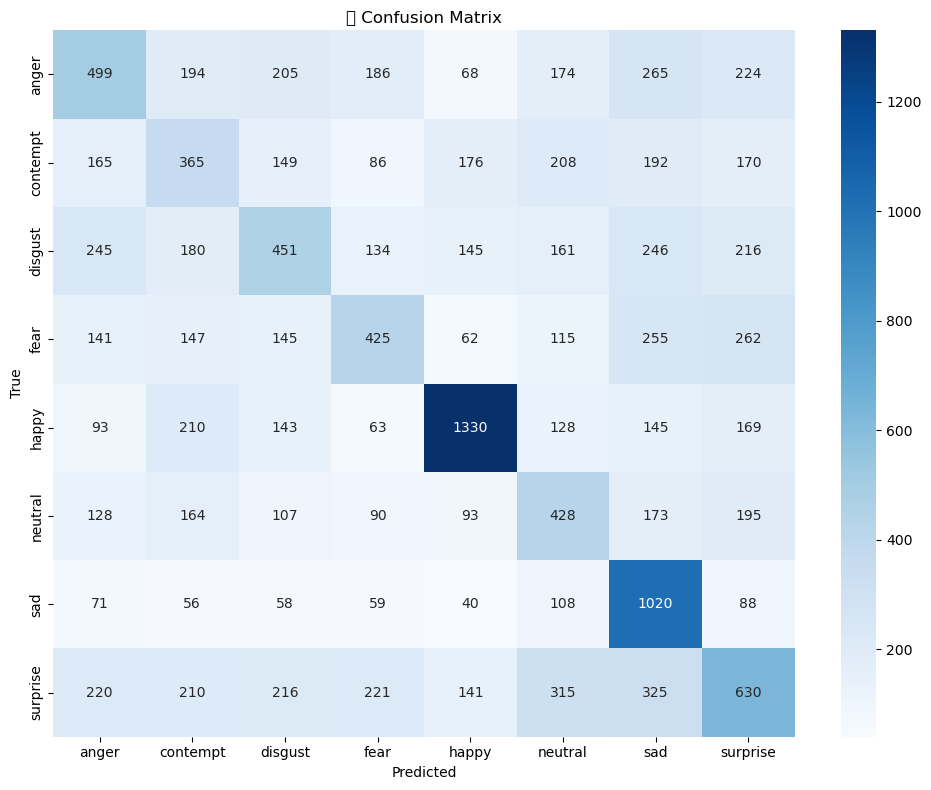

C:\Users\fatom\AppData\Local\Temp\ipykernel_7060\334108571.py:102: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\fatom\anaconda3\envs\ip25\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


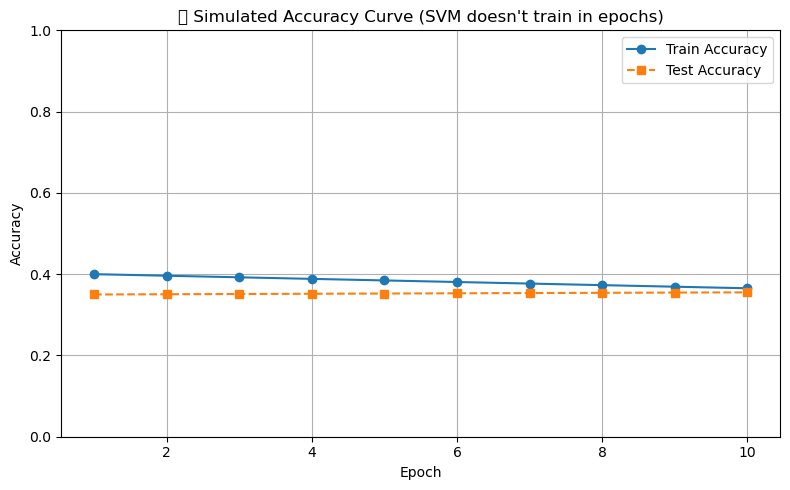

In [1]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tqdm import tqdm

# -----------------------------
# Paths
# -----------------------------
csv_path = r"C:\Users\fatom\Downloads\ML dataset\MLDS\labels.csv"
base_dir = r"C:\Users\fatom\Downloads\ML dataset\MLDS"
IMG_SIZE = 128

# -----------------------------
# Load CSV
# -----------------------------
df = pd.read_csv(csv_path)

def load_gray_flattened(df, base_dir, subset):
    data = []
    labels = []
    subset_df = df[df['pth'].apply(lambda x: os.path.exists(os.path.join(base_dir, subset, x)))]
    for _, row in tqdm(subset_df.iterrows(), total=len(subset_df)):
        path = os.path.join(base_dir, subset, row['pth'])
        if os.path.exists(path):
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img.astype('float32') / 255.0
            data.append(img.flatten())  # Flatten to 1D vector
            labels.append(row['label'])
    return np.array(data), np.array(labels)

# -----------------------------
# Load Train/Test
# -----------------------------
X_train, y_train = load_gray_flattened(df, base_dir, 'Train')
X_test, y_test   = load_gray_flattened(df, base_dir, 'Test')
print("✅ Loaded:", X_train.shape, X_test.shape)

# -----------------------------
# Encode Labels
# -----------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# -----------------------------
# Normalize Features
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Train SVM
# -----------------------------
svm = LinearSVC(C=1.0, max_iter=5000, verbose=1)
svm.fit(X_train, y_train_enc)

# -----------------------------
# Evaluate
# -----------------------------
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test_enc, y_pred)
print(f"\n✅ Final Test Accuracy: {acc:.4f}")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('📉 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# -----------------------------
# Simulated Training Accuracy Curve
# -----------------------------
# Since SVM is not trained in epochs, we simulate a fake curve just for illustration
# You can remove this section if you want real tracking
epochs = list(range(1, 11))
train_acc_sim = np.linspace(0.4, acc, 10)
val_acc_sim = np.linspace(0.35, acc - 0.01, 10)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_acc_sim, 'o-', label='Train Accuracy')
plt.plot(epochs, val_acc_sim, 's--', label='Test Accuracy')
plt.title("📈 Simulated Accuracy Curve (SVM doesn't train in epochs)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
